This is our notebook for visualizations over the entire dataset--no feature transformations/cleaning done.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from dateutil import parser

In [2]:
crime = pd.read_csv("data.csv")

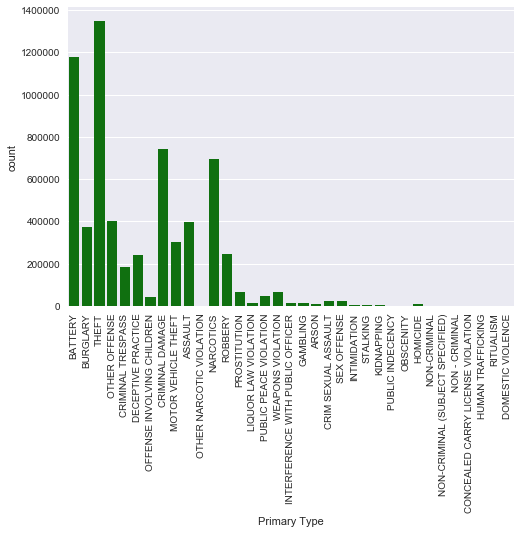

In [3]:
# Primary type counts
plt.xticks(rotation=90)
sns.countplot(x='Primary Type', data=crime, color='green')
plt.show()

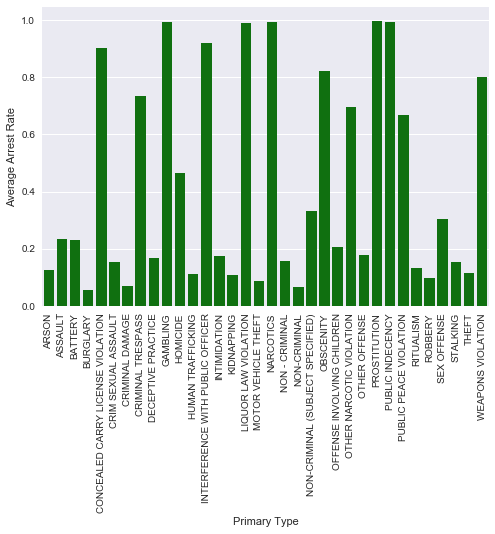

In [25]:
# Average arrest rate by primary type
arrest_rates = crime[['Primary Type', 'Arrest']].groupby('Primary Type', as_index=False).mean()
ax = sns.barplot(x='Primary Type', y='Arrest', data=arrest_rates, color='green')
plt.xticks(rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

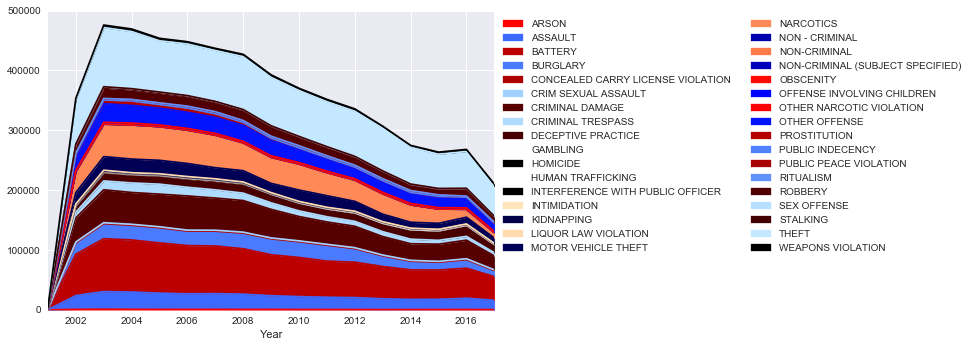

In [29]:
# Primary type over the years
years = crime.groupby(['Primary Type', 'Year'], as_index=False).size().unstack(level=0, fill_value=0)
years.plot.area(colormap='flag')
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=2)
plt.show()

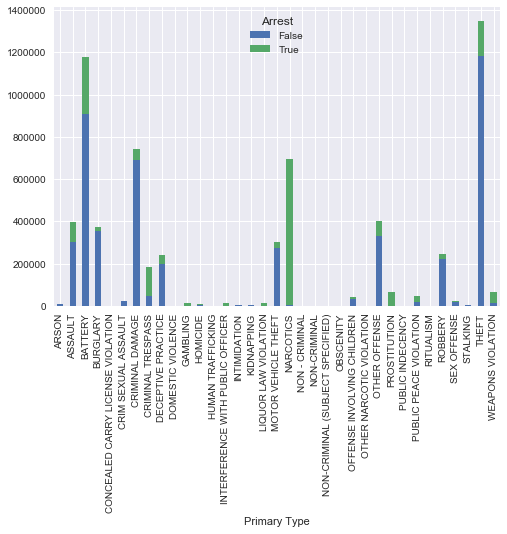

In [6]:
# Arrests per primary_type
primary_type_by_arrest = pd.pivot_table(crime, index="Primary Type", columns= "Arrest", aggfunc='size')
primary_type_by_arrest.plot.bar(stacked=True)
plt.show()

In [7]:
crime = crime[np.isfinite(crime["Ward"])] # drop N/A values
crime[['Ward']] = crime[['Ward']].astype(int) # convert "Ward" column to int

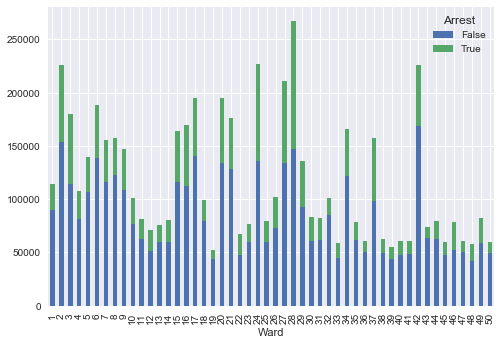

In [8]:
# Arrests per ward
ward_by_arrest = pd.pivot_table(crime, index="Ward", columns= "Arrest", aggfunc='size')
ward_by_arrest.plot.bar(stacked=True)
plt.show()

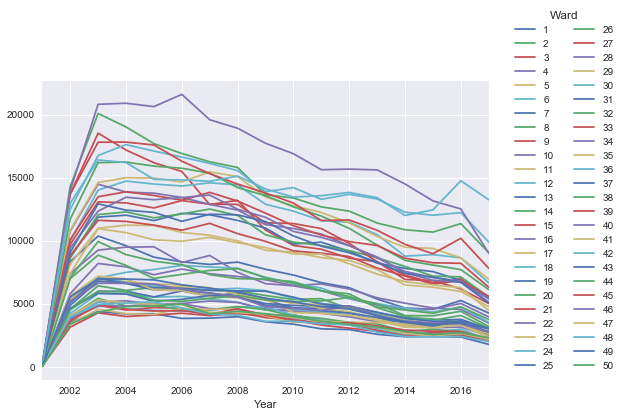

In [9]:
# Ward reports over time
wards_over_time = pd.pivot_table(crime, index="Year", columns="Ward", aggfunc='size')
wards_over_time.plot.line()
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0), ncol=2, title="Ward")
plt.show()

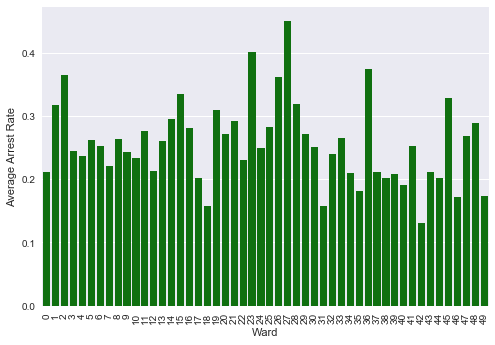

In [10]:
# Average arrest rate by ward
ward_arrest_rates = crime[["Ward", "Arrest"]].groupby("Ward", as_index=False).mean()
ax = sns.barplot(x="Ward", y="Arrest", data=ward_arrest_rates, color="green", )
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

In [11]:
crime = crime[np.isfinite(crime["District"])] # drop N/A values
crime[['District']] = crime[['District']].astype(int) # convert "District" column to int

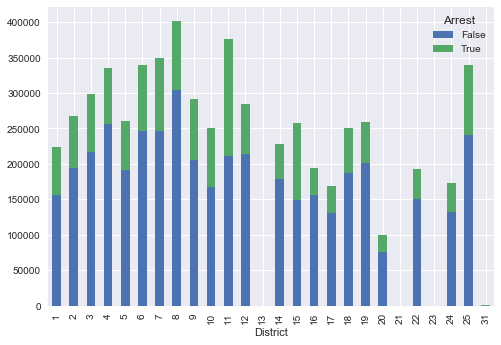

In [12]:
# Arrests per district
district_by_arrest = pd.pivot_table(crime, index="District", columns= "Arrest", aggfunc='size')
district_by_arrest.plot.bar(stacked=True)
plt.show()

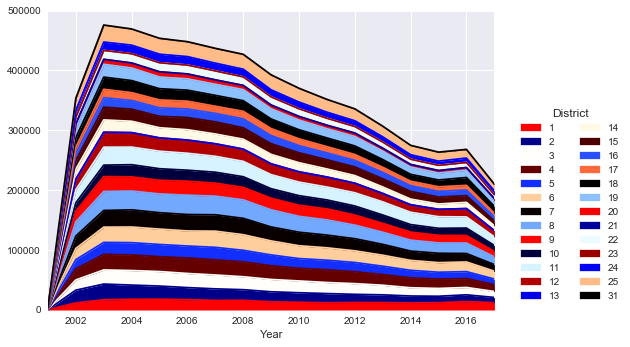

In [30]:
# District reports over time
districts_over_time = pd.pivot_table(crime, index="Year", columns="District", aggfunc='size')
districts_over_time.plot.area(colormap='flag')
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0), ncol=2, title="District")
plt.show()

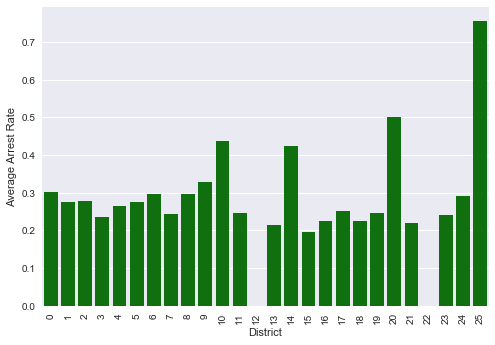

In [14]:
# Average arrest rate by district
district_arrest_rates = crime[["District", "Arrest"]].groupby("District", as_index=False).mean()
ax = sns.barplot(x="District", y="Arrest", data=district_arrest_rates, color="green", )
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

In [15]:
def convert_to_datetime(row) :
    dt = parser.parse(row["Date"])
    return dt
    
def label_day_of_week (row) :
    dt = row["Datetime"]
    return dt.weekday()

def label_day_of_month (row) :
    dt = row["Datetime"]
    return dt.day

def label_month(row) :
    dt = row["Datetime"]
    return dt.month

def label_year(row) :
    dt = row["Datetime"]
    return dt.year

def label_hour(row) : 
    dt = row["Datetime"]
    return dt.hour

In [16]:
crime["Datetime"] = crime.apply(lambda row : convert_to_datetime(row), axis = 1)
crime["Day of Week"] = crime.apply(lambda row : label_day_of_week(row), axis = 1)
crime["Day of Month"] = crime.apply(lambda row : label_day_of_month(row), axis = 1)
crime["Month"] = crime.apply(lambda row : label_month(row), axis = 1)
crime["Hour"] = crime.apply(lambda row : label_hour(row), axis = 1)

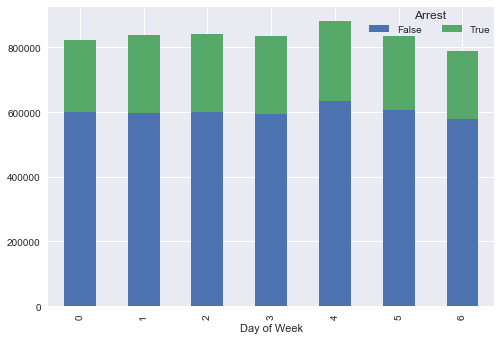

In [22]:
# Arrests by day of the week 
arrests_day_of_week = pd.pivot_table(crime, index="Day of Week", columns= "Arrest", aggfunc='size')
arrests_day_of_week.plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.02), ncol=2, title="Arrest")
plt.show()

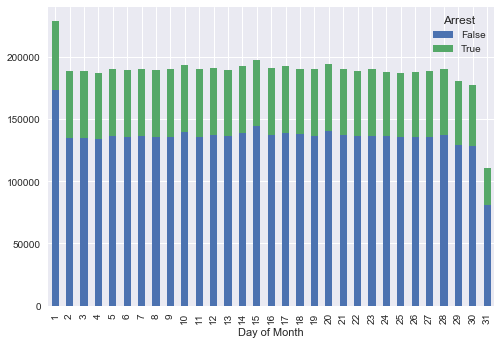

In [18]:
# Arrests by day of the month 
arrests_day_of_month = pd.pivot_table(crime, index="Day of Month", columns= "Arrest", aggfunc='size')
arrests_day_of_month.plot.bar(stacked=True)
plt.show()

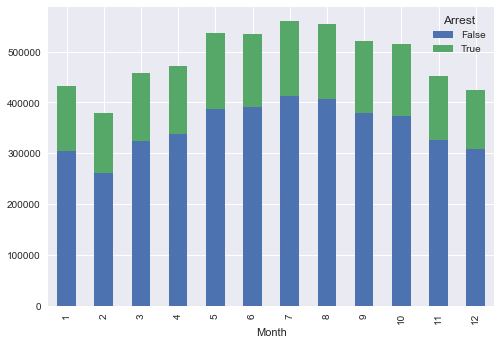

In [19]:
# Arrests by month
arrests_month = pd.pivot_table(crime, index="Month", columns= "Arrest", aggfunc='size')
arrests_month.plot.bar(stacked=True)
plt.show()

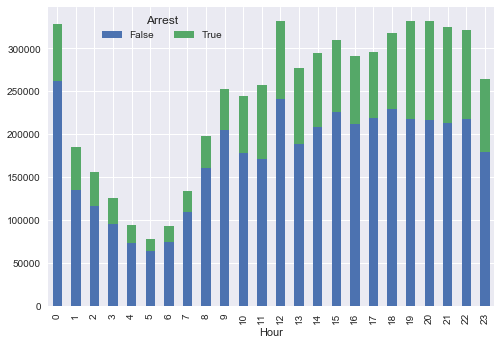

In [21]:
# Arrests by hour
arrests_hour = pd.pivot_table(crime, index="Hour", columns= "Arrest", aggfunc='size')
arrests_hour.plot.bar(stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(.1, 1), ncol=2, title="Arrest")
plt.show()

In [31]:
def label_day_of_year(row) : 
    return row["Datetime"].timetuple().tm_yday

crime["Day of Year"] = crime.apply(lambda row : label_day_of_year(row), axis = 1)
crime[:10]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Datetime,Day of Week,Day of Month,Month,Hour,Day of Year
0,6530342,HP603653,10/01/2008 03:30:00 PM,076XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,02/04/2016 06:33:39 AM,41.756303,-87.605332,"(41.756302533, -87.605331512)",2008-10-01 15:30:00,2,1,10,15,275
1,6530343,HP603773,10/01/2008 05:00:00 PM,031XX S GREEN ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,02/04/2016 06:33:39 AM,41.837176,-87.647215,"(41.837176353, -87.647214569)",2008-10-01 17:00:00,2,1,10,17,275
2,6530344,HP600313,09/29/2008 04:15:00 PM,063XX S STONY ISLAND AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,...,02/04/2016 06:33:39 AM,41.779873,-87.586451,"(41.779872827, -87.586450869)",2008-09-29 16:15:00,0,29,9,16,273
3,6530345,HP600270,09/29/2008 05:30:00 PM,063XX S STONY ISLAND AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,...,02/04/2016 06:33:39 AM,41.779873,-87.586451,"(41.779872827, -87.586450869)",2008-09-29 17:30:00,0,29,9,17,273
4,6530346,HP603903,10/01/2008 06:30:00 PM,022XX S TRUMBULL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,...,02/04/2016 06:33:39 AM,41.850796,-87.711312,"(41.850796161, -87.711312309)",2008-10-01 18:30:00,2,1,10,18,275
5,6530347,HP592535,02/01/2008 12:01:00 AM,061XX S KENWOOD AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,02/04/2016 06:33:39 AM,41.783316,-87.593121,"(41.783316167, -87.593120705)",2008-02-01 00:01:00,4,1,2,0,32
6,6530349,HP600353,09/27/2008 09:30:00 PM,037XX W MONTROSE AVE,0460,BATTERY,SIMPLE,RESTAURANT,False,False,...,02/04/2016 06:33:39 AM,41.961028,-87.721312,"(41.961028223, -87.721312024)",2008-09-27 21:30:00,5,27,9,21,271
7,6530350,HP599696,09/28/2008 07:30:00 PM,008XX W LAWRENCE AVE,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,02/04/2016 06:33:39 AM,41.969139,-87.651081,"(41.96913938, -87.651080731)",2008-09-28 19:30:00,6,28,9,19,272
8,6530352,HP603942,10/01/2008 09:00:00 AM,017XX N RICHMOND ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,...,02/04/2016 06:33:39 AM,41.912888,-87.700320,"(41.912887796, -87.700319812)",2008-10-01 09:00:00,2,1,10,9,275
9,6530353,HP603743,10/01/2008 06:00:00 PM,033XX W DIVISION ST,4650,OTHER OFFENSE,SEX OFFENDER: FAIL TO REGISTER,STREET,False,False,...,02/04/2016 06:33:39 AM,41.902800,-87.709856,"(41.902800026, -87.709856412)",2008-10-01 18:00:00,2,1,10,18,275
